# **Load Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mth
cancer=pd.read_csv("https://raw.githubusercontent.com/ThuanLy-0092/PCA_Regression/main/cancer_data.csv")
avg_house_hold=pd.read_csv("https://raw.githubusercontent.com/ThuanLy-0092/PCA_Regression/main/avg-household-size_data.csv")
cancer.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [ ]:
avg_house_hold.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [ ]:
data = pd.merge(cancer, avg_house_hold, on=['geography'], how='inner')
data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,53,35,2.54
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,53,37,2.34
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,53,39,2.62
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,53,41,2.52
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,53,43,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,20,53,2.08
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,20,55,2.90
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,20,57,3.04
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,20,59,2.56


# **Data Preprocessing:**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

**Xem các biến kiểu categorical**

In [ ]:
data.describe(include='O')

,binnedinc,geography
count,3047,3047
unique,10,3047
top,"(54545.6, 61494.5]","Kitsap County, Washington"
freq,306,1


**Xem các biến kiểu numberic**

In [ ]:
data.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306,30.272071,101.802429,2.529682
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816,15.054873,104.315612,0.248449
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,1.000000,1.000000,1.860000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419,19.000000,35.000000,2.380000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478,29.000000,79.000000,2.500000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677,45.000000,133.000000,2.640000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,56.000000,840.000000,3.970000


In [ ]:
data.isnull().mean()*100

avganncount                 0.000000
avgdeathsperyear            0.000000
target_deathrate            0.000000
incidencerate               0.000000
medincome                   0.000000
popest2015                  0.000000
povertypercent              0.000000
studypercap                 0.000000
binnedinc                   0.000000
medianage                   0.000000
medianagemale               0.000000
medianagefemale             0.000000
geography                   0.000000
percentmarried              0.000000
pctnohs18_24                0.000000
pcths18_24                  0.000000
pctsomecol18_24            74.991795
pctbachdeg18_24             0.000000
pcths25_over                0.000000
pctbachdeg25_over           0.000000
pctemployed16_over          4.988513
pctunemployed16_over        0.000000
pctprivatecoverage          0.000000
pctprivatecoveragealone    19.986872
pctempprivcoverage          0.000000
pctpubliccoverage           0.000000
pctpubliccoveragealone      0.000000
p

**Phát hiện 3 cột có giá trị NULL**

**ta nhận thấy ở cột pctsomecol18_24  có số lượng Null quá lớn chiếm hơn 70% nên ta sẽ loại bỏ cột này**

In [ ]:
data=data.drop(["pctsomecol18_24"],axis=1)

**Trực quan hóa tập dữ liệu đầu vào theo các biến kiểu numberic**

In [ ]:
data.hist(bins=30, figsize=(100, 100))
plt.show()

In [ ]:
def quantile_floor_cap(data, control_threshold=100, adjustment=0.05):
    for column in data.describe().columns.dropna():
        # Xác định ngưỡng lower và upper từ quantile 5 và 95
        floor_value = data[column].quantile(0.05)
        cap_value = data[column].quantile(0.95)
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Áp dụng quantile-based flooring và capping cho cột dữ liệu
        outlier_mask = (data[column] < lower_bound) | (data[column] > upper_bound)
        data.loc[outlier_mask, column] = np.where(data.loc[outlier_mask, column] < lower_bound, floor_value, cap_value)

        # Kiểm tra số lượng mẫu bị điều chỉnh và điều chỉnh ngưỡng nếu cần
        if outlier_mask.sum() > control_threshold:
            floor_value += adjustment
            cap_value -= adjustment

    return data

data=quantile_floor_cap(data)

C:\Users\Vinh Thuan\AppData\Local\Temp\ipykernel_9780\658824625.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4
 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4
 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4
 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4
 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4
 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4
 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4
 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4
 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4
 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4
 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749.4 749

**Sau khi dọn outlier**

In [ ]:
data.hist(bins=30, figsize=(100, 100))
plt.show()

In [ ]:
data.shape

(3047, 35)

**Trực quan hóa pctemployed16_over và pctprivatecoveragealone**

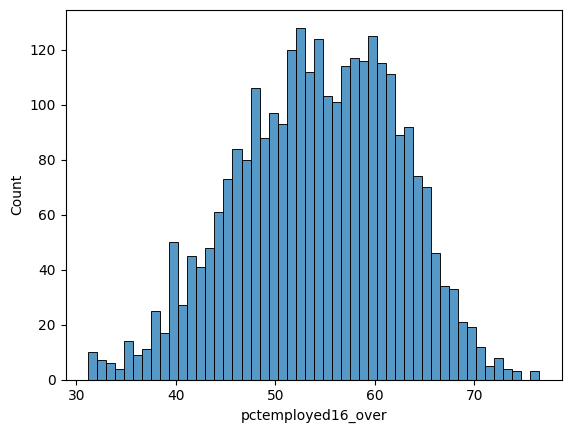

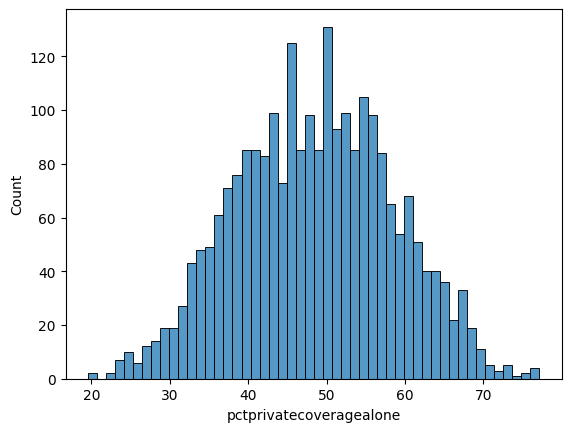

In [ ]:
sns.histplot(data['pctemployed16_over'],bins=50)
plt.show()
sns.histplot(data['pctprivatecoveragealone'],bins=50)
plt.show()

In [ ]:
print("Tổng số dữ liệu bị missing pctemployed16_over trong tập data: ")
print(data['pctemployed16_over'].isnull().sum(),'/',data.shape[0])
print("Tổng số dữ liệu bị missing pctprivatecoveragealone trong tập data: ")
print(data['pctprivatecoveragealone'].isnull().sum(),'/',data.shape[0])

Tổng số dữ liệu bị missing pctemployed16_over trong tập data: 
152 / 3047
Tổng số dữ liệu bị missing pctprivatecoveragealone trong tập data: 
609 / 3047


**Tiếp theo sẽ fill 2 cột có giá trị null theo trung bình của state(Tiểu bang)**

In [ ]:
mean_state_16_over=data.groupby('statefips')['pctemployed16_over'].mean()
mean_state_16_over

mean_state_coveragealone=data.groupby('statefips')['pctprivatecoveragealone'].mean()

data['pctemployed16_over'] = data.apply(lambda row: mean_state_16_over[row['statefips']] if pd.isnull(row['pctemployed16_over']) else row['pctemployed16_over'], axis=1)

data['pctprivatecoveragealone'] = data.apply(lambda row: mean_state_coveragealone[row['statefips']] if pd.isnull(row['pctprivatecoveragealone']) else row['pctprivatecoveragealone'], axis=1)

In [ ]:
data.isnull().sum()

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
geography                  0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
statefips                  0
countyfips                 0
avghouseholdsi

In [ ]:
import re

mean_dict = {}
# khởi tạo 1 dict để lưu
for value in data['binnedinc'].unique():
    #tiến hành chuyển đổi str sang số
    numbers = re.findall(r'\d+\.?\d*', value)

    # ép kiểu nó thành float rồi tính trung bình
    numbers = [float(val) for val in numbers]
    mean = np.mean(numbers)

    # Lưu vào dict với key là chuỗi trước đó và value là trung bình từng khoảng
    mean_dict[value] = mean

mean_series = pd.Series(mean_dict)
print(mean_series)


(61494.5, 125635]     93564.75
(48021.6, 51046.4]    49534.00
(42724.4, 45201]      43962.70
(51046.4, 54545.6]    52796.00
(37413.8, 40362.7]    38888.25
(40362.7, 42724.4]    41543.55
(54545.6, 61494.5]    58020.05
(34218.1, 37413.8]    35815.95
[22640, 34218.1]      28429.05
(45201, 48021.6]      46611.30
dtype: float64


In [ ]:
# Tạo một hàm lambda để thay thế giá trị trong cột 'binnedinc'
data['binnedinc'] = data.apply(lambda row: mean_series[row['binnedinc']] if row['binnedinc'] in mean_series.index else row['binnedinc'], axis=1)
data['binnedinc'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 3047 entries, 0 to 3046
Series name: binnedinc
Non-Null Count  Dtype  
--------------  -----  
3047 non-null   float64
dtypes: float64(1)
memory usage: 23.9 KB


In [ ]:
data['statefips'].value_counts()

statefips
48    233
13    155
51    125
21    120
29    115
17    102
20    102
37     99
19     99
47     95
18     92
39     87
27     87
26     83
28     82
31     80
40     77
5      75
55     72
42     67
12     66
22     64
1      63
36     62
8      60
46     59
6      57
54     55
38     51
30     48
45     46
16     42
53     39
41     36
35     32
49     27
24     24
56     23
34     21
2      18
32     17
23     16
4      15
50     14
25     14
33     10
9       8
44      5
15      4
10      3
11      1
Name: count, dtype: int64

In [ ]:
data[['geography', 'countyfips', 'statefips']]

,geography,countyfips,statefips
0,"Kitsap County, Washington",35.0,53
1,"Kittitas County, Washington",37.0,53
2,"Klickitat County, Washington",39.0,53
3,"Lewis County, Washington",41.0,53
4,"Lincoln County, Washington",43.0,53
...,...,...,...
3042,"Ellsworth County, Kansas",53.0,20
3043,"Finney County, Kansas",55.0,20
3044,"Ford County, Kansas",57.0,20
3045,"Franklin County, Kansas",59.0,20


**Dựa vào countyfips và statefips ta thấy được chúng cũng có thể biểu thị được các thành phần bên trong geography ,cụ thể là county sẽ nằm trước dấu phẩy và state sẽ nằm sau dấu phẩy và chúng tương ứng với các số bên countyfips và statefips**

In [ ]:
data=data.drop('geography',axis=1)

In [ ]:
data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
0,1972.000305,749.4,164.9,489.800000,61898.0,436220.1,11.2,747.578565,93564.75,39.30,...,14.0,81.780529,2.594728,4.471892,1.843479,52.856076,6.118831,53,35.0,2.54
1,173.000000,70.0,161.3,411.600000,48127.0,43269.0,18.6,23.111234,49534.00,33.00,...,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,53,37.0,2.34
2,102.000000,50.0,174.7,349.700000,49348.0,21026.0,14.6,47.560164,49534.00,45.00,...,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,53,39.0,2.62
3,427.000000,202.0,194.8,430.400000,44243.0,75882.0,17.1,747.578565,43962.70,42.80,...,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,53,41.0,2.52
4,57.000000,26.0,144.4,350.100000,49955.0,10321.0,12.5,0.000000,49534.00,48.30,...,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,53,43.0,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1972.000305,15.0,149.6,453.549422,46961.0,6343.0,12.4,0.000000,46611.30,44.20,...,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,20,53.0,2.08
3043,1972.000305,43.0,150.1,453.549422,48609.0,37118.0,18.8,747.578565,49534.00,30.40,...,17.7,75.706245,2.326771,4.471892,7.858399,52.007937,8.186470,20,55.0,2.90
3044,1972.000305,46.0,153.9,453.549422,51144.0,34536.0,15.0,747.578565,52796.00,30.90,...,16.8,87.961629,2.313188,1.316472,7.858399,55.153949,7.809192,20,57.0,2.98
3045,1972.000305,52.0,175.0,453.549422,50745.0,25609.0,13.3,0.000000,49534.00,39.00,...,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,20,59.0,2.56


# **Implement PCA:**


In [ ]:
data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
0,1972.000305,749.4,164.9,489.800000,61898.0,436220.1,11.2,747.578565,93564.75,39.30,...,14.0,81.780529,2.594728,4.471892,1.843479,52.856076,6.118831,53,35.0,2.54
1,173.000000,70.0,161.3,411.600000,48127.0,43269.0,18.6,23.111234,49534.00,33.00,...,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,53,37.0,2.34
2,102.000000,50.0,174.7,349.700000,49348.0,21026.0,14.6,47.560164,49534.00,45.00,...,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,53,39.0,2.62
3,427.000000,202.0,194.8,430.400000,44243.0,75882.0,17.1,747.578565,43962.70,42.80,...,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,53,41.0,2.52
4,57.000000,26.0,144.4,350.100000,49955.0,10321.0,12.5,0.000000,49534.00,48.30,...,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,53,43.0,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1972.000305,15.0,149.6,453.549422,46961.0,6343.0,12.4,0.000000,46611.30,44.20,...,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,20,53.0,2.08
3043,1972.000305,43.0,150.1,453.549422,48609.0,37118.0,18.8,747.578565,49534.00,30.40,...,17.7,75.706245,2.326771,4.471892,7.858399,52.007937,8.186470,20,55.0,2.90
3044,1972.000305,46.0,153.9,453.549422,51144.0,34536.0,15.0,747.578565,52796.00,30.90,...,16.8,87.961629,2.313188,1.316472,7.858399,55.153949,7.809192,20,57.0,2.98
3045,1972.000305,52.0,175.0,453.549422,50745.0,25609.0,13.3,0.000000,49534.00,39.00,...,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,20,59.0,2.56


In [ ]:
print("The field name of data: ", data.columns)

The field name of data:  Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'percentmarried',
       'pctnohs18_24', 'pcths18_24', 'pctbachdeg18_24', 'pcths25_over',
       'pctbachdeg25_over', 'pctemployed16_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack',
       'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate',
       'statefips', 'countyfips', 'avghouseholdsize'],
      dtype='object')


In [ ]:
print("(Num of datas,fields):",data.shape)

(Num of datas,fields): (3047, 34)


In [ ]:
X=data.drop('target_deathrate',axis=1)
Y=data['target_deathrate']

**Vì task 3 cần phải build model nên em sẽ chia train, test để scale trước tránh việc leak dữ liệu từ tập test**

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
##80%-train,20%-test
X_train, X_test, y_train , y_test = train_test_split(X, Y, test_size=0.2)
# chia tập huấn luyện thành tập huấn luyện và tập test

print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape} \ty_test: {y_test.shape}")


Training size: 	X_train: (2437, 33) 	y_train: (2437,)
Testing size: 	X_test: (610, 33) 	y_test: (610,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo scaler
scaler = StandardScaler()

# Fit scaler trên tập huấn luyện và transform cả tập huấn luyện tập kiểm chứng và tập kiểm tra
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Training size: \tX_train: {X_train_scaled.shape} \ty_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test_scaled.shape} \ty_test: {y_test.shape}")

X_train_scaled


Training size: 	X_train: (2437, 33) 	y_train: (2437,)
Testing size: 	X_test: (610, 33) 	y_test: (610,)


array([[-0.66525119, -0.60056989,  0.58250147, ..., -0.74762513,
         1.06860309, -1.36031332],
       [-0.47817905, -0.34544609,  0.17718354, ...,  1.56938255,
        -0.49454007, -0.56127149],
       [-0.60943128, -0.54685961,  0.3165786 , ...,  0.44397882,
        -0.68319528, -0.89028871],
       ...,
       [ 0.08303738,  0.08871194,  1.0092648 , ..., -1.14482645,
         1.7423717 ,  2.2118737 ],
       [-0.59887075, -0.51105277,  2.43538346, ..., -0.15182315,
         0.90689863, -0.60827395],
       [-0.20964   , -0.02318446, -0.39111938, ...,  0.7087797 ,
        -0.46758933,  0.84880234]])

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Khởi tạo PCA với số lượng thành phần chính khác nhau
num_components = list(range(1, 33, 1))
explained_variance_ratios_train = []


for n in num_components:
    # Khởi tạo và fit PCA cho tập huấn luyện
    pca_train = PCA(n_components=n)
    X_train_pca = pca_train.fit_transform(X_train_scaled)
    # Tính tỷ lệ phương sai được giải thích cho tập huấn luyện
    explained_variance_ratios_train.append(np.sum(pca_train.explained_variance_ratio_))

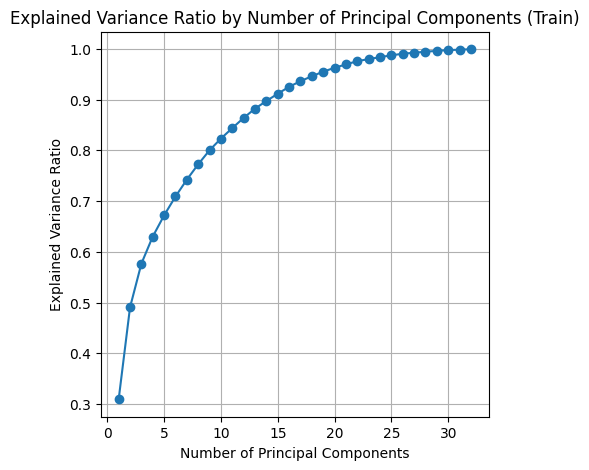

In [ ]:
# Trực quan hóa tỷ lệ phương sai được giải thích
def plot_explained_Var(num_components,explained_variance_ratios_train):
    plt.figure(figsize=(5, 5))
    plt.plot(num_components, explained_variance_ratios_train, marker='o', linestyle='-')
    plt.title('Explained Variance Ratio by Number of Principal Components (Train)')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid(True)

plot_explained_Var(num_components,explained_variance_ratios_train)


# **Dimensionality Reduction:**

In [ ]:
from math import floor

n = 20
variance_ratio_threshold = 0.95
n_components_list = []
for _ in range(n):
    # Thực hiện PCA trên dữ liệu train và tính số chiều cần giữ lại
    n_components_95_train = np.argmax(np.cumsum(pca_train.explained_variance_ratio_) >=variance_ratio_threshold) + 1
    # Thêm số chiều vào danh sách
    n_components_list.append(n_components_95_train)

# Tính số chiều trung bình
average_n_components = floor(np.mean(n_components_list))

print("Số chiều trung bình cần giữ lại sau", n, "lần chạy là:", average_n_components)

Số chiều trung bình cần giữ lại sau 20 lần chạy là: 19


In [ ]:
n_components_95_train = np.argmax(np.cumsum(pca_train.explained_variance_ratio_) >= 0.95) + 1
print("Số lượng thành phần chính để giữ lại 95% phương sai dữ liệu ban đầu ở tập train:", n_components_95_train)

Số lượng thành phần chính để giữ lại 95% phương sai dữ liệu ban đầu ở tập train: 19


In [ ]:
n_component=average_n_components

pca_train = PCA(n_components=n_component)
X_train_pca = pca_train.fit_transform(X_train_scaled)
X_test_pca=pca_train.transform(X_test_scaled)
pca_train.explained_variance_ratio_

array([0.30964462, 0.18114946, 0.08609934, 0.05334339, 0.04174009,
       0.03714913, 0.0332457 , 0.03028121, 0.02769141, 0.02294973,
       0.02067848, 0.02008025, 0.01820999, 0.01507195, 0.01430604,
       0.01365631, 0.01111503, 0.00965988, 0.00909882])

## **Model training**

**Train với X đã pca sử dụng model Linear Regression**

In [ ]:
from sklearn import linear_model
lnr = linear_model.LinearRegression()
lnr.fit(X_train_pca, y_train)



LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

train_pred_pca = lnr.predict(X_train_pca)


train_r2_pca = r2_score(y_train, train_pred_pca)
train_mse = mean_squared_error(train_pred_pca, y_train)
train_mae = mean_absolute_error(train_pred_pca, y_train)
# Đánh giá sử dụng cross-validation trên tập huấn luyện
cv_scores = cross_val_score(lnr, X_train_pca, y_train, cv=5, scoring='r2')
cv_r2_mean = np.mean(cv_scores)
print(">> Train R2: ",train_r2_pca)
print(">> Train MSE: ", train_mse )
print(">> Train MAE: ", train_mae)
# In kết quả R2 trung bình từ cross-validation trên tập huấn luyện
print("Cross-validated R2 trên tập huấn luyện:", cv_r2_mean)

>> Train R2:  0.508498490839496
>> Train MSE:  320.241429259559
>> Train MAE:  13.567879228366415
Cross-validated R2 trên tập huấn luyện: 0.5002259521674625


In [ ]:
test_pred_pca = lnr.predict(X_test_pca)
test_r2_pca=r2_score(y_test, test_pred_pca )
mse_test_pca=mean_squared_error(test_pred_pca, y_test)
mae_test_pca=mean_absolute_error(test_pred_pca, y_test)
print(">> Test R2: ",test_r2_pca)
print(">> Test MSE: ", mse_test_pca)
print(">> Test MAE: ", mae_test_pca)

>> Test R2:  0.4737774198132816
>> Test MSE:  357.1018774832672
>> Test MAE:  14.287799731425844


In [ ]:
df1= {
    'Metric': ['R2_train', 'MSE_train', 'MAE_train', 'Cross-validated R2','R2_test', 'MSE_test', 'MAE_test'],
    'PCA_LNR': [train_r2_pca, train_mse, train_mae, cv_r2_mean,test_r2_pca,mse_test_pca,mae_test_pca]
}
df1 = pd.DataFrame(df1)
df1

,Metric,PCA_LNR
0,R2_train,0.508498
1,MSE_train,320.241429
2,MAE_train,13.567879
3,Cross-validated R2,0.500226
4,R2_test,0.473777
5,MSE_test,357.101877
6,MAE_test,14.287800


**Train với X gốc**

In [ ]:
lnr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Đánh giá trên tập kiểm tra
train_pred_original = lnr.predict(X_train_scaled)

train_r2 = r2_score(y_train, train_pred_original)
train_mse = mean_squared_error(train_pred_original, y_train)
train_mae = mean_absolute_error(train_pred_original, y_train)
# Đánh giá sử dụng cross-validation trên tập huấn luyện



print(">> Train R2: ",train_r2)

print(">> Train MSE: ", train_mse )

print(">> Train MAE: ", train_mae )

# Sử dụng cross-validation để đánh giá hiệu suất trên tập huấn luyện
cv_scores = cross_val_score(lnr, X_train_scaled, y_train, cv=5, scoring='r2')
cv_r2_mean = np.mean(cv_scores)
# In kết quả R2 trung bình từ cross-validation trên tập huấn luyện
print("Cross-validated R2 trên tập huấn luyện:", cv_r2_mean)



>> Train R2:  0.5220022023826216
>> Train MSE:  311.44298651974816
>> Train MAE:  13.378038952319502
Cross-validated R2 trên tập huấn luyện: 0.5050112301278398


In [ ]:
test_pred_original = lnr.predict(X_test_scaled)
test_r2_original = r2_score(y_test, test_pred_original)
mse_test_original = mean_squared_error(test_pred_original, y_test)
mae_test_original = mean_absolute_error(test_pred_original, y_test)

print(">> Test R2 (Original): ", test_r2_original)
print(">> Test MSE (Original): ", mse_test_original)
print(">> Test MAE (Original): ", mae_test_original)


>> Test R2 (Original):  0.4832511074920953
>> Test MSE (Original):  350.67290277907625
>> Test MAE (Original):  14.13212696618344


In [ ]:
df2= {
    'Metric': ['R2_train', 'MSE_train', 'MAE_train', 'Cross-validated R2','R2_test', 'MSE_test', 'MAE_test'],
    'Original_LNR': [train_r2, train_mse, train_mae, cv_r2_mean,test_r2_original,mse_test_original,mae_test_original]
}
df2 = pd.DataFrame(df2)
df2


,Metric,Original_LNR
0,R2_train,0.522002
1,MSE_train,311.442987
2,MAE_train,13.378039
3,Cross-validated R2,0.505011
4,R2_test,0.483251
5,MSE_test,350.672903
6,MAE_test,14.132127


In [ ]:
df_compare_LNR=pd.merge(df1, df2, on=['Metric'], how='inner')
df_compare_LNR

,Metric,PCA_LNR,Original_LNR
0,R2_train,0.508498,0.522002
1,MSE_train,320.241429,311.442987
2,MAE_train,13.567879,13.378039
3,Cross-validated R2,0.500226,0.505011
4,R2_test,0.473777,0.483251
5,MSE_test,357.101877,350.672903
6,MAE_test,14.287800,14.132127


**Thử training với Ridge Regression (LNR nhưng có thêm Regularization)**

**Tìm alpha tối ưu khi chạy mô hình**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
# Tạo một đối tượng Lasso Regression
Rid_regress=linear_model.Ridge()

# Thiết lập các giá trị alpha muốn thử nghiệm
alphas = [0.00015,0.0015,0.015,0.15, 1, 10, 100]

# Tạo một grid search để tìm ra alpha tối ưu
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(Rid_regress, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['alpha']

# In ra giá trị alpha tối ưu và điểm số tương ứng
print("Best alpha for Ridge:", best_alpha)
print("Best MSE:", -grid_search.best_score_)

Best alpha for Ridge: 100
Best MSE: 320.83651127137443


In [ ]:
best_Ridge=linear_model.Ridge(best_alpha)

**Train với X gốc**

In [ ]:
best_Ridge.fit(X_train_scaled, y_train)

Ridge(alpha=100)

In [ ]:
train_Ridge_pred = best_Ridge.predict(X_train_scaled)

train_r2_Ridge = r2_score(y_train, train_Ridge_pred)
train_mse_Ridge = mean_squared_error(train_Ridge_pred, y_train)
train_mae_Ridge = mean_absolute_error(train_Ridge_pred, y_train)

print(">> Train R2 (Ridge): ", train_r2_Ridge)
print(">> Train MSE (Ridge): ", train_mse_Ridge)
print(">> Train MAE (Ridge): ", train_mae_Ridge)

# Sử dụng cross-validation để đánh giá hiệu suất trên tập huấn luyện
cv_scores_Ridge = cross_val_score(best_Ridge, X_train_scaled, y_train, cv=10, scoring='r2')

# In kết quả R2 trung bình từ cross-validation trên tập huấn luyện
print("Cross-validated R2 trên tập huấn luyện (Ridge):", np.mean(cv_scores_Ridge))


>> Train R2 (Ridge):  0.5199759979301958
>> Train MSE (Ridge):  312.7631749580812
>> Train MAE (Ridge):  13.3942339052002
Cross-validated R2 trên tập huấn luyện (Ridge): 0.504370211735249


In [ ]:
test_pred_Ridge = best_Ridge.predict(X_test_scaled)
test_r2_Ridge = r2_score(y_test, test_pred_Ridge)
mse_test_Ridge = mean_squared_error(test_pred_Ridge, y_test)
mae_test_Ridge = mean_absolute_error(test_pred_Ridge, y_test)

print(">> Test R2 (Ridge): ", test_r2_Ridge)
print(">> Test MSE (Ridge): ", mse_test_Ridge)
print(">> Test MAE (Ridge): ", mae_test_Ridge)


>> Test R2 (Ridge):  0.48347597579231727
>> Test MSE (Ridge):  350.52030405903037
>> Test MAE (Ridge):  14.166490845894716


In [ ]:
# Tạo dataframe cho mô hình Ridge
df_ridge_original = {
    'Metric': ['R2_train', 'MSE_train', 'MAE_train', 'Cross-validated R2', 'R2_test', 'MSE_test', 'MAE_test'],
    'Ridge_Original': [train_r2_Ridge, train_mse_Ridge, train_mae_Ridge, np.mean(cv_scores_Ridge), test_r2_Ridge, mse_test_Ridge, mae_test_Ridge]
}
df_ridge_original = pd.DataFrame(df_ridge_original)
df_ridge_original

,Metric,Ridge_Original
0,R2_train,0.519976
1,MSE_train,312.763175
2,MAE_train,13.394234
3,Cross-validated R2,0.504370
4,R2_test,0.483476
5,MSE_test,350.520304
6,MAE_test,14.166491


**Train với Ridge theo X đã PCA**

In [ ]:
best_Ridge.fit(X_train_pca, y_train)


Ridge(alpha=100)

In [ ]:
train_pred_pca = best_Ridge.predict(X_train_pca)

train_r2_pca = r2_score(y_train, train_pred_pca)
train_mse_pca = mean_squared_error(train_pred_pca, y_train)
train_mae_pca = mean_absolute_error(train_pred_pca, y_train)

# Đánh giá sử dụng cross-validation trên tập huấn luyện
cv_scores_pca = cross_val_score(lnr, X_train_pca, y_train, cv=5, scoring='r2')
cv_r2_mean_pca = np.mean(cv_scores_pca)

print(">> Train R2 (PCA): ", train_r2_pca)
print(">> Train MSE (PCA): ", train_mse_pca)
print(">> Train MAE (PCA): ", train_mae_pca)
print("Cross-validated R2 trên tập huấn luyện (PCA):", cv_r2_mean_pca)


>> Train R2 (PCA):  0.5081972449340386
>> Train MSE (PCA):  320.43770824858404
>> Train MAE (PCA):  13.573772153960352
Cross-validated R2 trên tập huấn luyện (PCA): 0.5002259521674625


In [ ]:
test_pred_Ridge_pca = best_Ridge.predict(X_test_pca)
test_r2_Ridge_pca = r2_score(y_test, test_pred_Ridge_pca)
mse_test_Ridge_pca = mean_squared_error(test_pred_Ridge_pca, y_test)
mae_test_Ridge_pca = mean_absolute_error(test_pred_Ridge_pca, y_test)

print(">> Test R2 (Ridge, PCA): ", test_r2_Ridge_pca)
print(">> Test MSE (Ridge, PCA): ", mse_test_Ridge_pca)
print(">> Test MAE (Ridge, PCA): ", mae_test_Ridge_pca)


>> Test R2 (Ridge, PCA):  0.47306870349702435
>> Test MSE (Ridge, PCA):  357.58282211899274
>> Test MAE (Ridge, PCA):  14.325381147517989


In [ ]:
# Tạo dataframe cho mô hình Ridge trên dữ liệu đã giảm chiều bằng PCA
df_ridge_pca = {
    'Metric': ['R2_train', 'MSE_train', 'MAE_train', 'Cross-validated R2', 'R2_test', 'MSE_test', 'MAE_test'],
    'Ridge_PCA': [train_r2_pca, train_mse_pca, train_mae_pca, np.mean(cv_scores_pca), test_r2_Ridge_pca, mse_test_Ridge_pca, mae_test_Ridge_pca]
}

df_ridge_pca = pd.DataFrame(df_ridge_pca)
df_ridge_pca

,Metric,Ridge_PCA
0,R2_train,0.508197
1,MSE_train,320.437708
2,MAE_train,13.573772
3,Cross-validated R2,0.500226
4,R2_test,0.473069
5,MSE_test,357.582822
6,MAE_test,14.325381


In [ ]:
df_compare_Ridge=pd.merge(df_ridge_original, df_ridge_pca, on=['Metric'])
df_compare_Ridge

,Metric,Ridge_Original,Ridge_PCA
0,R2_train,0.519976,0.508197
1,MSE_train,312.763175,320.437708
2,MAE_train,13.394234,13.573772
3,Cross-validated R2,0.504370,0.500226
4,R2_test,0.483476,0.473069
5,MSE_test,350.520304,357.582822
6,MAE_test,14.166491,14.325381


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Khởi tạo và huấn luyện mô hình Random Forests
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Dự đoán trên tập huấn luyện và tập validation
train_pred_rf = random_forest.predict(X_train_scaled)

# Đánh giá hiệu suất
train_mse_rf = mean_squared_error(y_train, train_pred_rf)
print("Mean Squared Error trên tập huấn luyện (Random Forests):", train_mse_rf)


Mean Squared Error trên tập huấn luyện (Random Forests): 42.970136622178835


In [ ]:
df_compare=pd.merge(df_compare_Ridge,df_compare_LNR,on=['Metric'])
df_compare

,Metric,Ridge_Original,Ridge_PCA,PCA_LNR,Original_LNR
0,R2_train,0.519976,0.508197,0.508498,0.522002
1,MSE_train,312.763175,320.437708,320.241429,311.442987
2,MAE_train,13.394234,13.573772,13.567879,13.378039
3,Cross-validated R2,0.504370,0.500226,0.500226,0.505011
4,R2_test,0.483476,0.473069,0.473777,0.483251
5,MSE_test,350.520304,357.582822,357.101877,350.672903
6,MAE_test,14.166491,14.325381,14.287800,14.132127


**Dựa vào các metrics sau khi train có được, ta thấy rằng với lượng thông tin được giữ lại ở mức 95% thì mô hình vẫn có thể hoạt động tốt**<br>
**Mặc dù hiệu suất mô hình có giảm đôi chút nhưng không đáng kể**<br>
>>-**Trên cả tập huấn luyện và tập kiểm tra, MSE của Ridge_PCA và PCA_LNR cao hơn so với các mô hình khác, cho thấy chúng có xu hướng dự đoán kém hơn.**<br>
>>-**Cross-validated R2 không có sự khác biệt lớn giữa các mô hình, nhưng Ridge_Original và Original_LNR vẫn có cross-validated R2 cao hơn so với Ridge_PCA và PCA_LNR.**

# **Interpretation and Analysis:**

In [ ]:
# 1) Tính ma trận hiệp phương sai mẫu
cov_mat = np.cov(X_train_scaled.T) # (p, N)

 # 2) Tìm trị riêng, vector riêng của ma trận hiệp phương sai mẫu
eigenvals, eigenvecs = np.linalg.eigh(cov_mat)

# 3) Sắp xếp cặp (trị riêng, vector riêng) với trị riêng theo chiều giảm dần
eigenpairs = [(abs(eigenval), eigenvec) for (eigenval, eigenvec) in zip(eigenvals, eigenvecs.T)]
eigenpairs = sorted(eigenpairs, key = lambda pair: pair[0], reverse = True)

# Lấy ra các trị riêng
eigenvals = [eigenval for (eigenval, _) in eigenpairs]
eigenvals = np.array(eigenvals)

eigenvecs = [eigenvec for (_, eigenvec) in eigenpairs] # chọn các vector riêng từ danh sách các cặp trị riêng-vector riêng


In [ ]:
# Tính ma trận covariance từ các vector riêng
cov_matrix = np.cov(eigenvecs)

# So sánh ma trận covariance với ma trận chuyển vị của nó
is_symmetric = np.allclose(cov_matrix, cov_matrix.T)

print("Is symmetric:", is_symmetric)

Is symmetric: True


**Vì heatmap không thể plot hết các biến 1 cách rõ ràng nên ta kiểm tra sự trực chuẩn bằng cách dùng ma trận hiệp phương sai chuyển vị của nó để so sánh với chính nó, và ở đây nó trả ra True nên ta có thể thấy rằng các họ vector riêng này trực chuẩn**

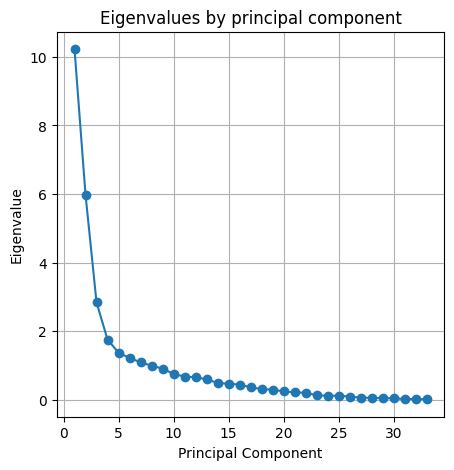

In [ ]:
# Vẽ biểu đồ của các giá trị riêng
plt.figure(figsize=(5, 5))
plt.plot(np.arange(1, len(eigenvals) + 1), eigenvals, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues by principal component')
plt.grid(True)
plt.show()

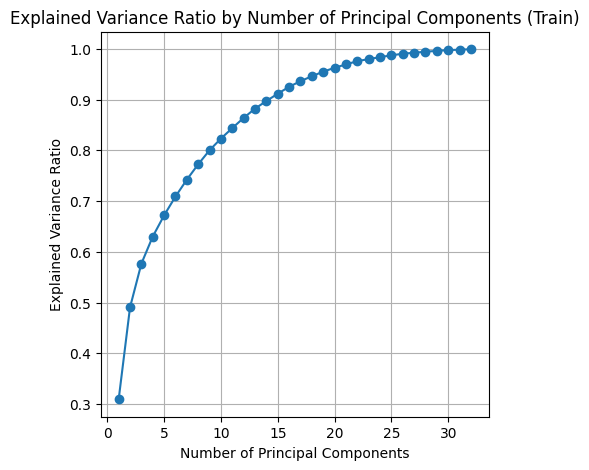

In [ ]:
plot_explained_Var(num_components,explained_variance_ratios_train)

**Dựa trên 2 plot ta thấy được, ban đầu khi chọn các biến sẽ có eigenvalue rất cao vì ta đã sắp xếp giảm dần các vecto riêng theo trị riêng của chúng để giúp cho việc lựa chọn số chiều mới được thuận tiện hơn.**

**Từ plot về explained variance ta thấy được để giữ lại lượng thông tin lớn thì cũng phải chọn số chiều lớn theo:**
>>Cụ thể ở đây 95% tỉ lệ phương sai đã được giữ lại và ta đã có thể loại bỏ được tầm 14 chiều khoảng 42.42% so với dữ liệu gốc
>>Và giữ lại được 20 chiều


In [ ]:
# Lặp qua mỗi tổng tích lũy trong mảng explained_variance_ratios_train
for i, cumulative_variance_ratio in enumerate(explained_variance_ratios_train):
    # In ra phần trăm giữ lại tích lũy tại mỗi phần tử
    print("Phần trăm phương sai giữ lại khi giữ lại %i chiều: %.2f" % (i+1, cumulative_variance_ratio * 100))


Phần trăm phương sai giữ lại khi giữ lại 1 chiều: 30.96
Phần trăm phương sai giữ lại khi giữ lại 2 chiều: 49.08
Phần trăm phương sai giữ lại khi giữ lại 3 chiều: 57.69
Phần trăm phương sai giữ lại khi giữ lại 4 chiều: 63.02
Phần trăm phương sai giữ lại khi giữ lại 5 chiều: 67.20
Phần trăm phương sai giữ lại khi giữ lại 6 chiều: 70.91
Phần trăm phương sai giữ lại khi giữ lại 7 chiều: 74.24
Phần trăm phương sai giữ lại khi giữ lại 8 chiều: 77.27
Phần trăm phương sai giữ lại khi giữ lại 9 chiều: 80.03
Phần trăm phương sai giữ lại khi giữ lại 10 chiều: 82.33
Phần trăm phương sai giữ lại khi giữ lại 11 chiều: 84.40
Phần trăm phương sai giữ lại khi giữ lại 12 chiều: 86.41
Phần trăm phương sai giữ lại khi giữ lại 13 chiều: 88.23
Phần trăm phương sai giữ lại khi giữ lại 14 chiều: 89.73
Phần trăm phương sai giữ lại khi giữ lại 15 chiều: 91.16
Phần trăm phương sai giữ lại khi giữ lại 16 chiều: 92.53
Phần trăm phương sai giữ lại khi giữ lại 17 chiều: 93.64
Phần trăm phương sai giữ lại khi giữ lại

>>**Để có cái nhìn rõ ràng hơn về những con số như ta đã thấy ở trên, lượng phương sai được giữ lại sau mỗi thành phần chính sẽ nhỏ dần lại do chúng đã được sắp xếp giảm dần theo trị riêng của eigenvector**
>>**Ta thấy từ chiều thứ 3 đã băt đầu có sự tăng chậm lại của phương sai chứng tỏ 3 thành phần chính đầu tiên có phương sai lớn nên chúng sẽ có tác động đến target nhiều nhất**

In [ ]:
df_compare


,Metric,Ridge_Original,Ridge_PCA,PCA_LNR,Original_LNR
0,R2_train,0.519976,0.508197,0.508498,0.522002
1,MSE_train,312.763175,320.437708,320.241429,311.442987
2,MAE_train,13.394234,13.573772,13.567879,13.378039
3,Cross-validated R2,0.504370,0.500226,0.500226,0.505011
4,R2_test,0.483476,0.473069,0.473777,0.483251
5,MSE_test,350.520304,357.582822,357.101877,350.672903
6,MAE_test,14.166491,14.325381,14.287800,14.132127


**Tuy là có sự chênh lệch nhỏ giữa r2 nhưng rõ ràng ta thấy hiệu suất của mô hình cũng đã bị giảm do đã làm mất 5% phương sai dữ liệu**

In [ ]:
components = list(range(1, 34, 1))
for co in components:
    pca_co = PCA(n_components=co)
    X_pca1 = pca_co.fit_transform(X_train_scaled)
    lnr.fit(X_pca1, y_train)
    print('Number of components:', co)
    train_pred = lnr.predict(X_pca1)
    print('> Train MSE: ', mean_squared_error(train_pred, y_train))
    print('> Train MAE: ', mean_absolute_error(train_pred ,y_train))
    print("> R2-Score: ", r2_score(y_train, train_pred))
    cv_scores = cross_val_score(lnr, X_pca1, y_train, cv=5, scoring='r2')
    cv_r2_mean = np.mean(cv_scores)
    print("Cross-validated R2 trên tập huấn luyện:", cv_r2_mean)

Number of components: 1
> Train MSE:  491.63820545081495
> Train MAE:  17.318017181894884
> R2-Score:  0.2454414143143705
Cross-validated R2 trên tập huấn luyện: 0.2425411928770556
Number of components: 2
> Train MSE:  488.7983530910666
> Train MAE:  17.204203120298942
> R2-Score:  0.24979997505348728
Cross-validated R2 trên tập huấn luyện: 0.2466769816632776
Number of components: 3
> Train MSE:  481.52725498520346
> Train MAE:  17.03507275594327
> R2-Score:  0.26095954207312244
Cross-validated R2 trên tập huấn luyện: 0.25757641369847295
Number of components: 4
> Train MSE:  435.9833894077034
> Train MAE:  16.291220336424118
> R2-Score:  0.33085955068881356
Cross-validated R2 trên tập huấn luyện: 0.3270181687096887
Number of components: 5
> Train MSE:  344.37423699121854
> Train MAE:  14.027970304683006
> R2-Score:  0.4714598370718812
Cross-validated R2 trên tập huấn luyện: 0.4670325750247777
Number of components: 6
> Train MSE:  344.4035094871129
> Train MAE:  14.0299240396595
> R2-Sc

**Ta thấy với số chiều càng nhỏ mô hình fit càng kém so với bộ data**

**>>Rõ ràng ta thấy được sự đánh đổi khi dùng PCA, nếu muốn mô hình không bị phức tạp bắt buộc ta phải loại bỏ 1 số đặc trưng, dẫn đến hiệu suất của mô hình bị ảnh hưởng ít nhiều.Nhưng ở lần PCA này ta đã có được 1 kết quả khá ấn tượng khi đã loại được 14/33 chiều chiếm 42.42% và giữ lại được 95% dữ liệu, từ đó có thể đã giảm được các hiện tượng như đa cộng tuyến của các biến.**

**Tiến hành plot ra 2 chiều quan trọng nhất là chiều thứ 1 và thứ 2**<br>
**Dùng LNR đã PCA X để plot**

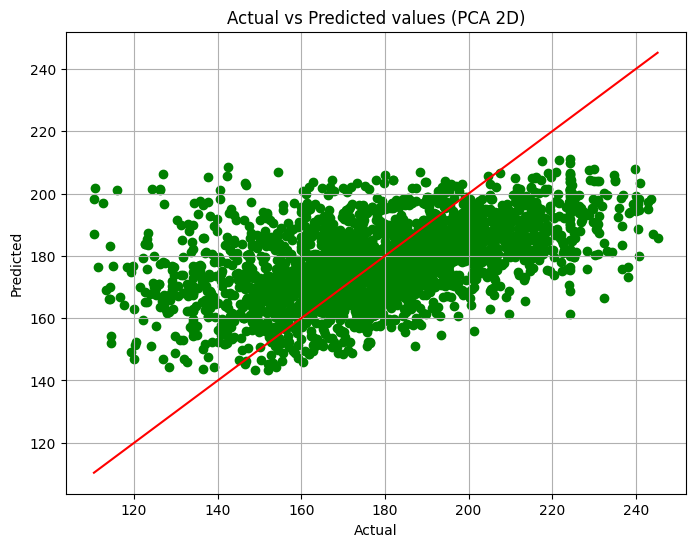

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_train_scaled)

lnr.fit(X_pca_2, y_train)

# Predict on training set
train_pred_pca = lnr.predict(X_pca_2)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train, train_pred_pca,color='green')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='-', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values (PCA 2D)')
plt.grid(True)
plt.show()

**Nhận thấy khi còn 2 chiều dữ liệu không được fit tốt nữa**

---

# **Report and Conclusion:**


---

## **A. Tóm tắt kết quả**

1. **Data Preprocessing:**
>>-ở 2 bộ data được cho bộ thứ nhất là cancer_reg và bộ thứ 2 là avg-household-size có 1 cột dữ liệu chung đó là geography thế nên em tiến hành merge nó lại theo geography.Nhưng vì không có cùng size nên phải check theo các dòng có chung kiểu geography để merge.<br><br>
>>-Với việc xử lí null, đầu tiên em sẽ check các biến không phải số và sau đó là xem các cột bị null<br><br>
>>-Với các cột có lượng null quá cao đã được bỏ hẳn ra khỏi bộ data cụ thể là cột: pctsomecol18_24<br><br>
>>-Và 2 cột có null còn lại là: pctprivatecoveragealone ,pctemployed16_over.<br><br>
>>-Sau khi trực quan hóa tập dữ liệu đầu vào em nhận ra các cột đang có các phân phối không đều và còn bị ảnh hưởng bởi outlier nên sẽ quyết định dọn.<br><br>
>>-Bước dọn outlier như sau: tiến hành lọc các outlier theo khoảng tứ phân vị và nếu nó thuộc đầu trên sẽ kéo nó về khoảng 95 với đầu dưới sẽ kéo về 5, và để tránh việc nó bị tập trung quá vào 1 chỗ thì em đã thêm threshold vào với mỗi 100 outlier được phát hiện thì khoảng trên và dưới sẽ thu hẹp về 5%. em làm như vậy bởi vì khi thử fill nó về median thì dữ liệu ở median của các biến đều chiếm phần lớn. Và để hạn chế việc nếu bỏ hoặc fill về trung vị sẽ không còn bắt được trend của data nên với các dữ liệu ngoại lai ở trên sẽ kéo về 95 và dưới thì kéo về 5.<br><br>
>>-Sau khi dọn xong outlier, em tiến hành fill lại các giá trị null có kiểu numberic ở 2 cột còn lại, bước outlier diễn ra trước vì để tránh sự ảnh hưởng của outlier lên giá trị mean mà em sắp fill lên 2 cột.<br><br>
>>-Với cả 2 cột em đều giải quyết bằng 1 cách là fill theo trung bình của tiểu bang thông qua mã tiếu bang(statefips)<br><br>
>>-Tiếp đến là cột binnedinc với khoảng giá trị là kiểu chuỗi, nên em tiến hành lấy trung bình khoảng của nó và fill nó lại tương ứng theo trung bình của từng khoảng.<br><br>
>>-Tiếp theo khám phá đến countyfips statefips geography lúc này khi gọi 3 cột geography cùng 2 cột fips ra thì nhận thấy cả 2 cột fip đang chỉ đến các thành phần bên trong geography vì thế em đã không encode nó mà bỏ hẳn cột geography.<br><br>


2. **Implement PCA:**

>>-Đầu tiên là sẽ xác định biến target của bài toán để ta tách nó ra và em xác định được targer_deathrate nên đã cho Y là cột này và X là phần còn lại<br><br>
>>-Tiếp theo là chia train_test để có thể tiến hành scale dữ liệu nhằm thực hiện PCA<br><br>
>>-em đã tiến hành plot explained_variance_ratios_train để có thể năm bắt được mình sẽ giữ được bao nhiêu tỉ lệ phương sai nếu giữ lại n biến<br><br>
>>-Sau khi plot ra em nhận ra được rằng từ lúc chạm mốc 80% dữ liệu thì sự thay đổi bắt đầu rõ hơn các khoảng cách nhau gần hơn, tỉ lệ phương sai giữ lại lúc này bắt đầu tăng chậm hơn nhưng em sẽ chọn mức 95% vì để đảm bảo được hiệu suất của mô hình khi build.<br><br>

3. **Dimensionality Reduction:**

>>-Để chọn được số chiều phù hợp thì em sẽ kết hợp với mức % tỉ lệ phương sai giữ lại từ task trước là 95% để làm<br><br>
>>-Lúc này cho 1 vòng lặp chạy 20 lần để tính trung bình mà số chiều n đưa ra đạt từ 0.95 đổ lên và chọn được n =19<br><br>
>>-Bước đến là bước PCA để giảm chiều dữ liệu, cho fit_transfrom X_train và transform nó cho X_Test với 2 biến này đã được scale từ task trước.<br><br>
>>**Model Training:**<br><br>
>>-Tiếp đến là bước train model với tập X gốc và X đã PCA<br><br>
>>-Ở đây em chọn Linear Regression và Ridge Regression để train thì thấy được rằng sau khi giảm chiều mô hình đã hoạt động với hiệu suất không như ban đầu nữa, hiệu suất của mô hình bị giảm nhưng không đáng kể.<br><br>
>>**=>Ở bước này làm cho em nhận ra được là mặc dù đó loại được 14 biến nhưng mô hình lại không bị ảnh hưởng quá nhiều lượng phương sai giữ lại còn ở khoảng 95% nữa.**<br><br>
>>**=>Mặc dù mô hình không có hiệu suất tốt như khi còn bộ data gốc nhưng sau khi giảm chiều nó đi thì chi phí tính toán cũng đã giảm rất nhiều bởi vì loại đi được 14 chiều giúp cho mô hình có thể fit gọn hơn, có thể không có chênh lệch nhiều do bộ data của chúng ta nhỏ, nhưng nếu nó là 1 bộ data lớn thì mọi chuyện sẽ khác.**

**Các metrics cụ thể khi train như như sau:**

In [ ]:
df_compare

,Metric,Ridge_Original,Ridge_PCA,PCA_LNR,Original_LNR
0,R2_train,0.519976,0.508197,0.508498,0.522002
1,MSE_train,312.763175,320.437708,320.241429,311.442987
2,MAE_train,13.394234,13.573772,13.567879,13.378039
3,Cross-validated R2,0.504370,0.500226,0.500226,0.505011
4,R2_test,0.483476,0.473069,0.473777,0.483251
5,MSE_test,350.520304,357.582822,357.101877,350.672903
6,MAE_test,14.166491,14.325381,14.287800,14.132127


4. **Interpretation and Analysis:**<br><br>
>>-Ở bước này sau khi quan sát eigenvalues và explained variance qua plot thì em có cái nhìn rõ hơn về các thành phần chính. Đây là 2 plot:

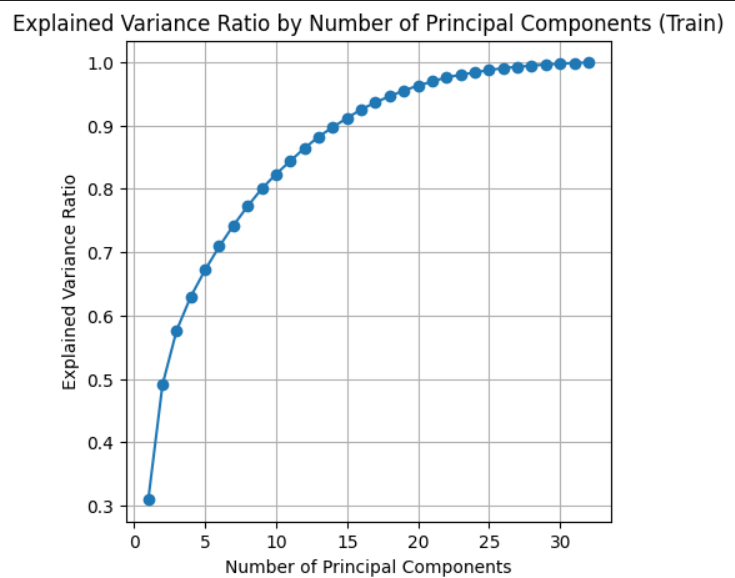

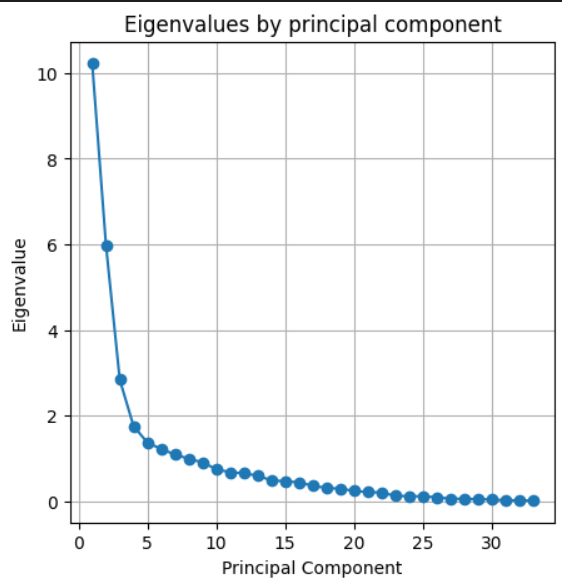

![image-3.png](attachment:image-3.png)           ![image-2.png](attachment:image-2.png)

>>-Ở bước này sau khi quan sát eigenvalues và explained variance qua plot thì em có cái nhìn rõ hơn về các thành phần chính. Đây là 2 plot:<br><br>
>>-Với sự sắp xếp giảm dần như vậy ta sẽ có thể dễ để chọn lựa các thành phần chính hơn, và với việc chọn càng ít chiều thì lượng phương sai giữ lại được cũng sẽ giảm đáng kể. Qua 4 quan sát đầu tiên sau đây về số liệu cụ thể của tỉ lệ phương sai giữ lại được ta sẽ có:<br><br>
>>+Phần trăm phương sai giữ lại khi giữ lại 1 chiều: 30.97<br><br>
>>+Phần trăm phương sai giữ lại khi giữ lại 2 chiều: 49.03<br><br>
>>+Phần trăm phương sai giữ lại khi giữ lại 3 chiều: 57.81<br><br>
>>+Phần trăm phương sai giữ lại khi giữ lại 4 chiều: 63.08<br><br>
>>-Dựa vào số liệu trên ta thấy khoảng cách giữa lượng phương sai từ 3 chiều sang 4 chiều đã tăng chậm lại đáng kể vo với việc chọn 3 chiều trước đó.<br><br>
**=>Chuyện này cho ta biết được 3 thành phần chính 1,2,3 đang là nòng cốt của các thành phần chính này.**

**Actual vs Predicted Value (PCA 2D)**


>>-Đây là plot khi kéo về còn 2 chiều bằng PCA ta có thể thấy rằng mô hình fit không được tốt nữa khi lượng phương sai giữ lại chỉ còn : 49,03 %theo số liệu đã trình bày trước đó <br><bbr>
>>-Plot được kết hợp bởi scatter và line

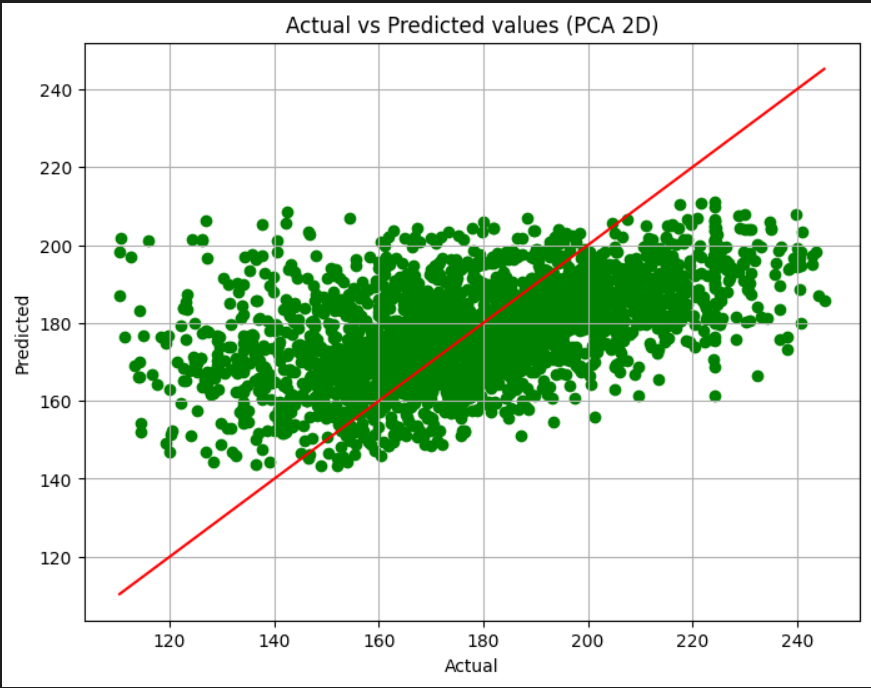![image.png]()

![image-2.png](attachment:image-2.png)

## **B.Những hiểu biết thu được từ bài tập:**<br><br>
>-Hiểu được cách giảm chiều dữ liệu bằng PCA<br><br>
>-Có thể tiền xử lí được bộ dữ liệu thực tế<br><br>
>-Có thêm những kiến thức về plot và sự biến động của dữ liệu<br><br>
>-Có cái nhìn tốt hơn về việc giảm chiều dữ liệu,trước đó khi build model em thường nghĩ mất nhiều biến sẽ làm cho mô hình hoạt động kém đi rất nhiều nhưng qua bài tập bản thân đã có cái nhìn rộng hơn. Khi đã có thể dùng các phép chiếu để loại bỏ đa cộng tuyến giữa các biến khi nó chiếu lên 1 không gian con nhỏ hơn sẽ làm cho các biến độc lập tuyến tình với nhau(đã thử lại bằng chuyển vị của covariance).<br><br>
>-Nhưng có 1 vấn đề là khi chọn số chiều ta cần phải chọn ra số chiều có lượng phương sai hợp lí để tránh ảnh hưởng nghiêm trọng đến mô hình, trong trường hợp chọn số chiều quá nhỏ có thể xảy ra tình trạng underfit như plot Actual vs Predicted. Cụ thể hơn là:<br>

>>Number of components: 1<br>
>> Train MSE:  496.7299432504231<br>
>> Train MAE:  17.445867765201708<br>
>> R2-Score:  0.23849168490593964<br>
>>Cross-validated R2 trên tập huấn luyện: 0.23729182259079792<br><br>
>>Number of components: 2<br>
>> Train MSE:  491.9998666750392<br>
>> Train MAE:  17.255362271701784<br>
>> R2-Score:  0.24574309523891913<br>
>>Cross-validated R2 trên tập huấn luyện: 0.24429612551580684<br><br>
>>Number of components: 3<br>
>> Train MSE:  484.52608837189763<br>
>> Train MAE:  17.05638363241833<br>
>> R2-Score:  0.25720071803848255<br>
>>Cross-validated R2 trên tập huấn luyện: 0.2535637731371352<br>

>-Đây là các thông số trên tập train khi chạy thử mô hình với số chiều nhỏ, rõ ràng ta thấy nó đang bị underfit khi mà nó không học được tốt trên bộ dữ liệu của ta<br><br>


## **C.Kết luận:**
>**-Với PCA ta có thể giảm chiều dữ liệu 1 cách hiệu quả bằng việc chọn ra lượng phương sai phù hợp mà dữ liệu mang lại trước khi tiến hành chọn số chiều.**<br><br>
>**-PCA có thể giúp ta giảm chi phí tính toán của mô hình khi đã giảm đi số lượng chiều đáng kể khi đó model sẽ cần ít bước hơn để fit với toàn bộ dữ liệu.**<br><br>
>**-PCA giúp tránh việc đa cộng tuyến với thuật toán của mình, làm giảm thiểu các trường hợp các biến có tương quan với nhau cao từ đó việc build model sẽ thuận lợi hơn.**<br><br>
>**-PCA cung cấp một cách tiếp cận hiệu quả để phân tích cấu trúc và biến đổi của dữ liệu. Bằng cách xem xét các thành phần chính, ta có thể hiểu được các mối quan hệ giữa các biến trong dữ liệu và tìm ra các thông tin quan trọng nhất.**<br><br>
>**-Trong 1 vài trường hợp việc giảm chiều dữ liệu còn có thể cải thiện được hiệu suất hoạt động của mô hình làm cho nó học được tốt hơn.<br><br>
>**-Nhưng cuối cùng ta vẫn cần phải lưu ý về việc chọn số chiều vì:**<br><br>
>>**+Nếu chọn số chiều quá lớn sẽ không cải thiện được nhiều, việc giảm chiều dữ liệu sẽ trở nên vô nghĩa**<br><br>
>>**+Nếu chọn số chiều quá nhỏ dẫn đến mất mát thông tin làm cho mô hình bị underfit và không hoạt động tốt**<br><br>